# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 9)})

### Step 2. Import the dataset from this 'datasets/appl_1980_2014.csv'

In [90]:
pd.read_csv('datasets/appl_1980_2014.csv')

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 3. Assign it to a variable apple

In [91]:
apple = pd.read_csv('datasets/appl_1980_2014.csv')

### Step 4.  Check out the type of the columns

In [97]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [96]:
apple.Date.astype('datetime64', copy=False)

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, Length: 8465, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [98]:
apple.set_index('Date', inplace=True)

### Step 7.  Is there any duplicate dates?

In [99]:
apple[apple.index.duplicated]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [100]:
apple.sort_values('Date',ascending=True,inplace=True)

### Step 9. Get the last business day of each month

In [109]:
apple[apple.index.isin(pd.date_range('1/1/1980', '1/1/2015', freq='BM'))]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83


### Step 10.  What is the difference in days between the first day and the oldest

In [83]:
(apple.index.max()-apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [149]:
apple.resample('M').mean().shape[0]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

Text(0.5, 0, 'Year')

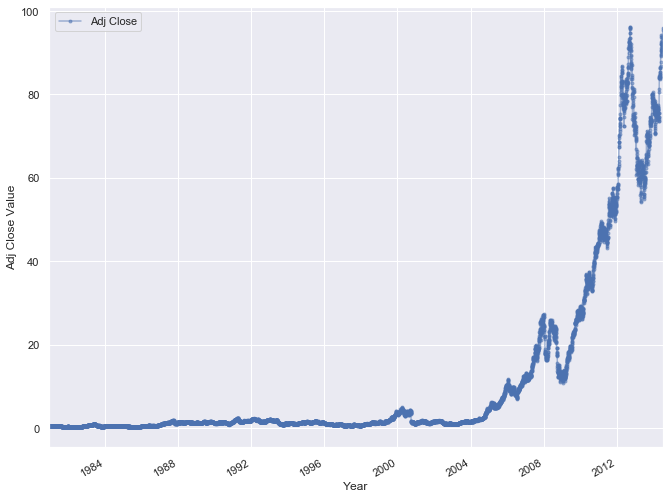

In [163]:
ax = apple['Adj Close'].plot(marker='.', alpha=0.5)
ax.legend()
ax.set_ylabel('Adj Close Value');
ax.set_xlabel('Year')

### BONUS: Create your own question and answer it.

In [152]:
apple.resample('M').sum()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,396.26,397.38,395.76,395.76,336212800,6.15
1981-01-31,666.85,668.36,664.75,664.75,152247200,10.37
1981-02-28,503.12,504.87,501.75,501.75,80404800,7.81
1981-03-31,548.63,550.37,546.40,546.40,175179200,8.53
1981-04-30,573.02,574.73,571.77,571.77,134232000,8.89
...,...,...,...,...,...,...
2014-03-31,11205.46,11265.53,11131.49,11197.50,1250424700,1590.75
2014-04-30,11341.72,11431.33,11261.51,11362.56,1608765200,1614.21
2014-05-31,12627.34,12733.83,12564.99,12667.11,1433917100,1807.23


### Which month (across all years) has the largest Open value on average?

In [178]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
apple.groupby([lambda y: apple.index.month]).mean().sort_values('Open', ascending=False).iloc[0].name

5